In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [ ]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  14:17    <DIR>          .
28/09/2024  22:20    <DIR>          ..
24/09/2024  20:19         5,736,098 best_model.pth
24/09/2024  20:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  11:46           132,935 training.ipynb
24/09/2024  20:19            24,818 training_best_history.png
24/09/2024  19:59           204,856 training_byol big embedding.ipynb
14/10/2024  13:11           247,018 training_byol.ipynb
19/09/2024  17:50           248,587 training_norms_visual.ipynb
01/10/2024  08:38           441,652 training-visual.ipynb
25/10/2024  17:59           252,630 transforms_debugging.ipynb
               9 File(s)      7,289,381 bytes
               2 Dir(s)  83,443,818,496 bytes free


In [3]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", 

In [4]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

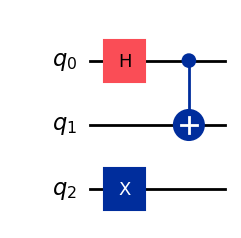

In [5]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [6]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [7]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


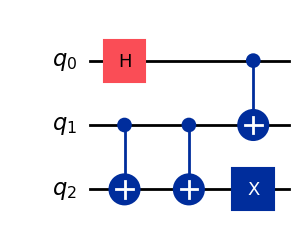

In [8]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [9]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraphs: [(None, <networkx.classes.digraph.DiGraph object at 0x0000015DBF543FB0>), (None, <networkx.classes.digraph.DiGraph object at 0x0000015DB335A540>), (None, <networkx.classes.digraph.DiGraph object at 0x0000015DBF05B830>), (None, <networkx.classes.digraph.DiGraph object at 0x0000015DD7A024E0>), (None, <networkx.classes.digraph.DiGraph object at 0x0000015DD7A039E0>)]
Matching subgraphs: [{'cx_1_control_0': 'cx_0_control_0', 'cx_2_target_0': 'cx_1_target_0', 'cx_1_control_1': 'cx_0_control_1', 'cx_2_target_1': 'cx_1_target_1'}]
Matching key: None
Matching subgraph selected: {'cx_1_control_0': 'cx_0_control_0', 'cx_2_target_0': 'cx_1_target_0', 'cx_1_control_1': 'cx_0_control_1', 'cx_2_target_1': 'cx_1_target_1'}
Current operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 1), Qu


Transformed Circuit:


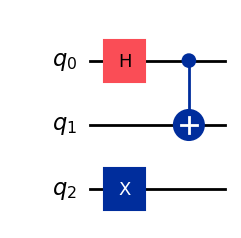

In [10]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


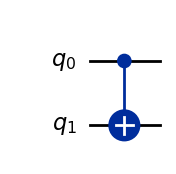

In [11]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [12]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [13]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A59730>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A57C80>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A56420>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A557F0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7AE90A0>)]
Pattern subgraphs: [('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A57C80>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7AE90A0>), ('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A59730>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A557F0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A56420>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0':


Transformed Circuit:


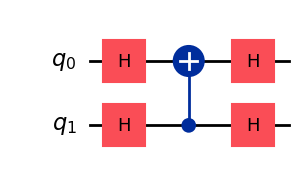

In [14]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


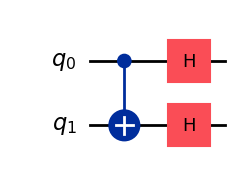

In [15]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [16]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [17]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7990DD0>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BE6D50>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B47170>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A57CE0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BB3080>)]
Pattern subgraphs: [('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BE6D50>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A57CE0>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B47170>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BB3080>), ('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7990DD0>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0', 'h_0_1': 'h_0_1', 'h_1_2': 'h_1_2'}]
Matching key: cx-h-h
Matching subgraph selected: {'cx_0_contro


Transformed Circuit:


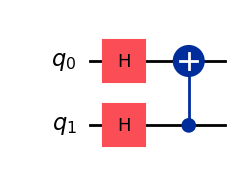

In [18]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


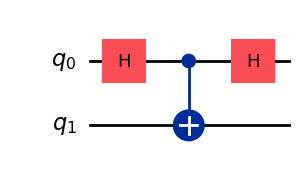

In [19]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C9EF00>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD78F3440>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A47E60>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C65580>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B9E6C0>)]
Pattern subgraphs: [('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A47E60>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD78F3440>), ('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C9EF00>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B9E6C0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C65580>)]
Matching subgraphs: [{'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_1': 'cx_0_control_0', 'cx_1_target_1':

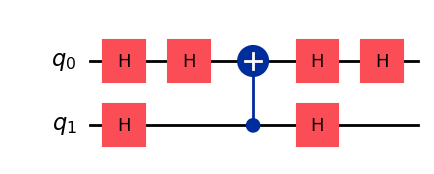

In [20]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test CNOTDecompositionTransformation

1st PATTERN: CNOT -> CNOT, CNOT, CNOT, CNOT

Original Circuit:


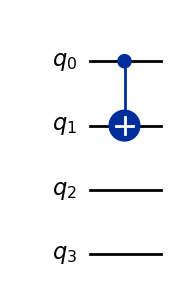

In [21]:
qc = QuantumCircuit(4)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x0000015DD7D8BEC0>), ('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B51F10>), ('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7D8B110>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 2)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clb

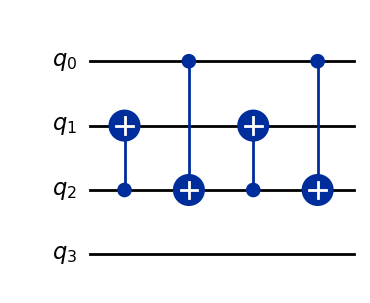

In [22]:
from QCCL.transformations import CNOTDecompositionTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2st PATTERN: CNOT, CNOT, CNOT, CNOT -> CNOT or 4 CNOTs

Original Circuit:


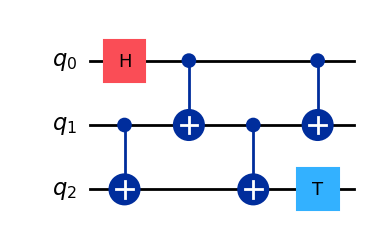

In [23]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD7CAAF00>), ('c-t-c-t', <networkx.classes.digraph.DiGraph object at 0x0000015DD7EA67B0>), ('t-c-t-c', <networkx.classes.digraph.DiGraph object at 0x0000015DBF4D6E40>)]
Matching subgraphs: [{'cx_1_control_1': 'cx_0_control_0', 'cx_2_target_1': 'cx_1_target_0'}, {'cx_0_control_4': 'cx_0_control_0', 'cx_1_target_4': 'cx_1_target_0'}, {'cx_0_control_2': 'cx_0_control_0', 'cx_1_target_2': 'cx_1_target_0'}, {'cx_1_control_3': 'cx_0_control_0', 'cx_2_target_3': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_1_control_1': 'cx_0_control_0', 'cx_2_target_1': 'cx_1_target_0'}
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'cx_0_control_2', 'cx_1_target_2', 'cx_1_control_3', 'cx_2_target_3', 'cx_0_control_4', 'cx_1_target_4', 't_2_5']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx',

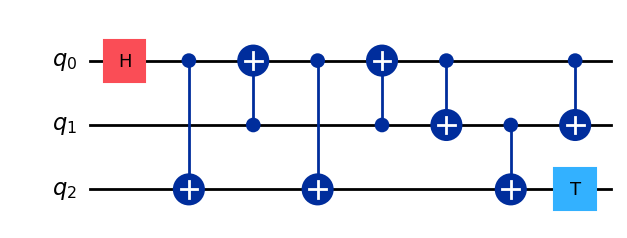

In [24]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = CNOTDecompositionTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ChangeOfBasisTransformation

In [25]:
from qiskit.circuit.library import HGate, ZGate, XGate, TGate
import random
from QCCL.transformations import ChangeOfBasisTransformation

1st PATTERN: single H, Z, or X

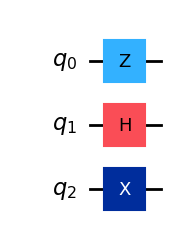

In [26]:
# Circuit with HZH pattern
qc = QuantumCircuit(3)
qc.z(0)
qc.h(1)
qc.x(2)

qc.draw('mpl')

Pattern subgraphs: [('x-h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A471A0>), ('x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C9DEE0>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A59730>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7EA7E00>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7EE59A0>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DBDFCD010>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD8F449B0>), ('h', <networkx.classes.digraph.DiGraph object at 0x0000015DD8F7AAB0>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BB2660>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BB0140>), ('z', <networkx.classes.digraph.DiGraph object at 0x0000015DD8FA0200>)]
Matching subgraphs: [{'x_2_2': 'x_0_0'}]
Matching key: x
Matching subgraph selected: {'x_2_2': 'x_0_0'}
Replacement: [(Instruction(name='h', num_qubits=1, num_clbit

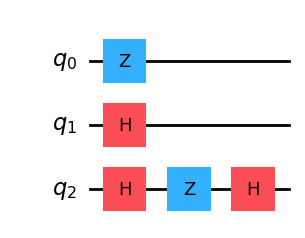

In [27]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: HZ, ZH, HX, XH

Original Circuit:


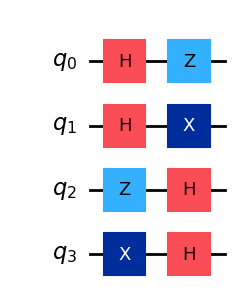

In [28]:
qc = QuantumCircuit(4)
qc.h(0)
qc.z(0)
qc.h(1)
qc.x(1)
qc.z(2)
qc.h(2)
qc.x(3)
qc.h(3)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('x', <networkx.classes.digraph.DiGraph object at 0x0000015DD9073F50>), ('h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7F09910>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD8FC3CB0>), ('z', <networkx.classes.digraph.DiGraph object at 0x0000015DD8FC3530>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD9032600>), ('z-h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B507D0>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7EE59A0>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD9033500>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7BB3DD0>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD9030500>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD9073380>)]
Matching subgraphs: [{'x_3_6': 'x_0_0'}, {'x_1_3': 'x_0_0'}]
Matching key: x
Matching subgraph selected: {'x_1_3': 'x_0_0'}
Replacement: [(Instruction(name='h', num

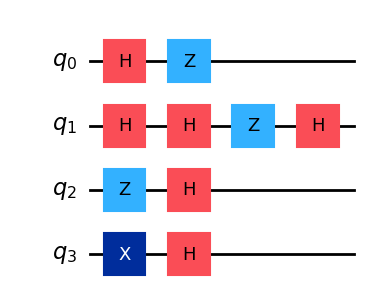

In [29]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

3rd PATTERN: HXH, HZH, ...

Original Circuit:


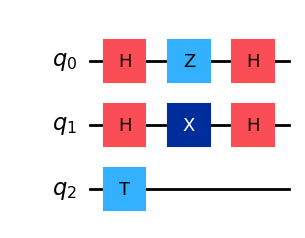

In [30]:
qc = QuantumCircuit(3)
qc.h(0)
qc.z(0)
qc.h(0)
qc.h(1)
qc.t(2)
qc.x(1)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('z-h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7F0A960>), ('x-h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7B51F10>), ('h-x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD7E42600>), ('x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7C9D2B0>), ('h-x', <networkx.classes.digraph.DiGraph object at 0x0000015DD7A57920>), ('x-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD90EE900>), ('z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD9030500>), ('h-z-h', <networkx.classes.digraph.DiGraph object at 0x0000015DD78DF980>), ('h-z', <networkx.classes.digraph.DiGraph object at 0x0000015DD8FC0EF0>), ('h', <networkx.classes.digraph.DiGraph object at 0x0000015DD79FCC50>), ('z', <networkx.classes.digraph.DiGraph object at 0x0000015DD7D8B0B0>)]
Matching subgraphs: [{'h_1_3': 'h_0_0', 'x_1_5': 'x_0_1', 'h_1_6': 'h_0_2'}]
Matching key: h-x-h
Matching subgraph selected: {'h_1_3': 'h_0_0', 'x_1_5': 'x_0_1', 'h

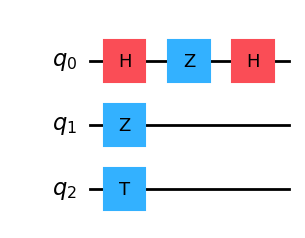

In [31]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ChangeOfBasisTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test ParallelXTransformation

1st PATTERN: parallel X

Original Circuit:


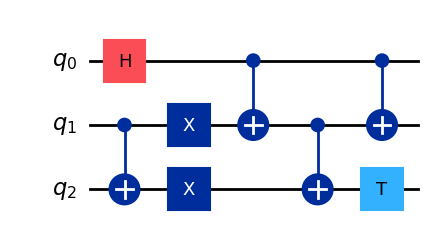

In [32]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.x(2)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DBDFCC5F0>)]
Matching subgraphs: []
Matching key: cx-x-cx
Found parallel X gates: x_1_2, x_2_3
Replacement: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], []), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], [])]
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'x_2_3', 'cx_0_control_4', 'cx_1_target_4', 'cx_1_control_5', 'cx_2_target_5', 'cx_0_control_6', 'cx_1_target_6', 't_2_7']
Predecessors and successors of control X gate: cx_1_control_1, cx_1_target_4
Predecessors and successors of target X gate: cx_2_target_1, cx_2_target_5
Adding gate: (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), 

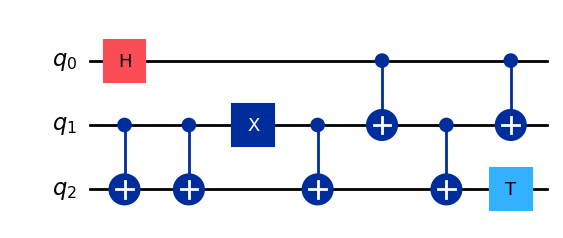

In [33]:
from QCCL.transformations import ParallelXTransformation

# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: cx-x-cx

Original Circuit:


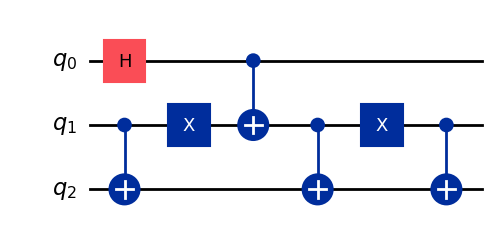

In [34]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1)  
qc.cx(1, 2)
qc.x(1)
qc.cx(1, 2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD9458A40>)]
Matching subgraphs: [{'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'x_1_5': 'x_0_1', 'cx_1_control_6': 'cx_0_control_2', 'cx_2_target_6': 'cx_1_target_2'}]
Matching key: cx-x-cx
Matching subgraph selected: {'cx_1_control_4': 'cx_0_control_0', 'cx_2_target_4': 'cx_1_target_0', 'x_1_5': 'x_0_1', 'cx_1_control_6': 'cx_0_control_2', 'cx_2_target_6': 'cx_1_target_2'}
Replacement: [(Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1)], []), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 2)], [])]
Graph nodes: ['h_0_0', 'cx_1_control_1', 'cx_2_target_1', 'x_1_2', 'cx_0_control_3', 'cx_1_target_3', 'cx_1_control_4', 'cx_2_target_4', 'x_1_5', 'cx_1_control_6', 'cx_2_target_6']

Transformed Circuit:


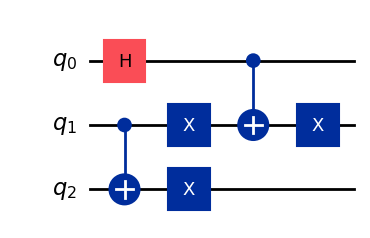

In [35]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

TEST: no match

Original Circuit:


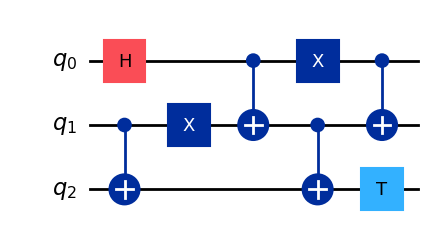

In [36]:
qc = QuantumCircuit(3)
 
qc.h(0)
qc.cx(1, 2)  
qc.x(1)
qc.cx(0, 1) 
qc.x(0) 
qc.cx(1, 2)
qc.cx(0, 1) 
qc.t(2)

qcg = QuantumCircuitGraph(qc)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [37]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = ParallelXTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

Pattern subgraphs: [('cx-x-cx', <networkx.classes.digraph.DiGraph object at 0x0000015DD95477A0>)]
Matching subgraphs: []
Matching key: cx-x-cx


NoMatchingSubgraphsError: No matching subgraphs found for the given pattern.